To perform supervised learning, we must decide how we’re going to rep-
resent functions/hypotheses h in a computer. As an initial choice, let’s say
we decide to approximate $y$ as a linear function of $x$:

$$h_{\theta} = \theta_0 + \theta_1x$$

Here, the $θ_i’s$ are the parameters (also called weights) parameterizing the
space of linear functions mapping from $X$ to $Y$. When there is no risk of
confusion, we will drop the $\theta$ subscript in $h_{\theta}(x)$, and write it more simply as
$h(x)$. To simplify our notation, we also introduce the convention of letting
$x_0 = 1$ (this is the intercept term), so that

$$h(x) = \sum_{i=1}^m \theta_ix_i = \theta^Tx$$

where on the right-hand side above we are viewing $\theta$ and $x$ both as vectors,
and here $n$ is the number of input variables (not counting $x_0$). Now, given a training set, how do we pick, or learn, the parameters $\theta$? One reasonable method seems to be to make $h(x)$ close to $y$, at least for the training examples we have. To formalize this, we will define a function that measures, for each value of the $θ’s$, how close the $h(x^{(i)})$'s are to the corresponding $y^{(i)}$'s. We define the cost or loss function $L(h({x}),y)$, is some measure of prediction error. 

The loss function is equal to the negated conditional log-likelihood
\begin{align*}
L(h({x}),y) &= - \log p(\mathcal{D}|{w})\\
&= - \sum_m \log p(y_m|{x}_m,{w})
\end{align*}

Given some data, we can approximate the expected risk with the empirical risk given by
\begin{align*}
R_{\mathcal{D}}(h) &= \frac{1}{m} \sum_m L(h({x}_m),y_m)
\end{align*}
Also, with infinite data, empirical risk is the expected risk
\begin{align*}
\lim_{m \to \infty} R_{\mathcal{D}}(h) &= R(h)
\end{align*}

This gives us an empirical risk (or cross-entropy) of
\begin{align*}
R_{\mathcal{D}}(h) = \frac{1}{m} \sum_m \|y_m - h({x})\|_2^2
\end{align*}
In this case, empirical risk is often referred to as the residual-sum-of-squares (RSS) or mean-square-error (MSE). The cost function used here defined as:

$$J(\theta) = \frac{1}{2m}\sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})^2$$

We want to choose $\theta$ so as to minimize $J(\theta)$. To do so, let’s use a search
algorithm that starts with some “initial guess” for $\theta$, and that repeatedly
changes $\theta$ to make $J(\theta)$ smaller, until hopefully we converge to a value of
$\theta$ that minimizes $J(\theta)$. Specifically, let’s consider the gradient descent
algorithm, which starts with some initial $\theta$, and repeatedly performs the
update:

$$\theta_j = \theta_j - \alpha \frac{\partial}{\partial{\theta_{j}}}J(\theta)$$


(This update is simultaneously performed for all values of $j = 0, . . . , n.$)
Here, $\alpha$ is called the learning rate. This is a very natural algorithm that
repeatedly takes a step in the direction of steepest decrease of $J$.
In order to implement this algorithm, we have to work out what is the
partial derivative term on the right hand side. Let’s first work it out for the
case of if we have only one training example $(x, y)$, so that we can neglect
the sum in the definition of $J$. We have:
\begin{align}
\frac{\partial}{\partial{\theta_{j}}}J(\theta) &= \frac{\partial}{\partial{\theta_{j}}}\frac{1}{2}(h_{\theta}(x)-y)^2\\
&= 2.\frac{1}{2}(h_{\theta}(x)-y)\frac{\partial}{\partial{\theta_{j}}}(h_{\theta}(x)-y)\\
&= (h_{\theta}(x)-y)\frac{\partial}{\partial{\theta_{j}}}(\sum_{i=0}^{n}\theta_i x_i-y)\\
&= (h_{\theta}(x)-y)x_j
\end{align}

Using the rule for a single training example, we derive the gradient descent algorithm for linear regression:

\begin{align}
repeat \{\\
&\theta_j = \theta_j - \alpha \frac{1}{m}\sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)}).x^{(i)}_j\\
\}
\end{align}

Simultaneously update all values of $j = 0, . . . , n.$

## Numerical Example

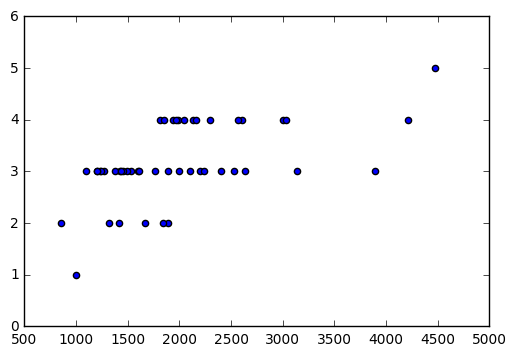

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy import newaxis, r_, c_, mat
from numpy.linalg import *

data = np.loadtxt('./Data/ex1data2.txt', delimiter=',')
X = mat(data[:, :2])
y = c_[data[:, 2]]
m = X.shape[0]

plt.scatter(X[:,0],X[:,1])
plt.show()

### Feature Normalization
Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).
#### Z-score normalization
The result of **standardization** (or **Z-score normalization**) is that the features will be rescaled so that they'll have the properties of a standard normal distribution with $\mu = 0$ and $\sigma = 1$, where $\mu$ is the mean (average) and $\sigma$ is the standard deviation from the mean; standard scores (also called ***z*** scores) of the samples are calculated as follows:

\begin{equation} z = \frac{x - \mu}{\sigma}\end{equation} 

#### Min-Max scaling
Standardizing the features so that they are centered around 0 with a standard deviation of 1 is not only important if we are comparing measurements that have different units, but it is also a general requirement for many machine learning algorithms. An alternative approach to Z-score normalization (or standardization) is the so-called **Min-Max scaling** (often also simply called "normalization" - a common cause for ambiguities). In this approach, the data is scaled to a fixed range - usually 0 to 1. The cost of having this bounded range - in contrast to standardization - is that we will end up with smaller standard deviations, which can suppress the effect of outliers.

A Min-Max scaling is typically done via the following equation:

\begin{equation} X_{norm} = \frac{X - X_{min}}{X_{max}-X_{min}} \end{equation}

In [3]:
def featureNormalize(X):
    X_norm = X.A
 
    mu = X_norm.mean(axis=0)
    X_norm -= mu # broadcasting
 
    sigma = X_norm.std(axis=0)
    X_norm /= sigma
 
    return mat(X_norm), mu, sigma

\begin{align*}
h_{\theta} = y_{predicted} = {w}^T{x}
\end{align*}
\begin{align*}
J(\theta) = \frac{1}{2m} \sum_{i=1}^m (y_i - y_{predicted})^2
\end{align*}
Here, $\theta=w$

In [22]:
def computeCost(X, y, theta):
    m = X.shape[0]
 
    predictions = X*theta
    sqrErrors = (predictions - y).A ** 2
    return 1./(2*m) * sqrErrors.sum()

$$\theta_j = \theta_j - \alpha \frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)}).x^{(i)}_j$$

In [23]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = X.shape[0]
 
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        theta = theta - alpha/m * X.T * (X*theta - y)
        J_history[i] = computeCost(X, y, theta)
    return theta, J_history


#### Regularized ridge linear regression
\begin{align*}
\text{min}_{\theta}\;\; J(\theta) &= \frac{1}{2m} \sum_{i=1}^{m}\big[(h_{\theta}(x^{(i)}) - y^{(i)})^2 + \lambda\sum_{j=1}^n\theta_j^2\big]\\
\theta_j &= \theta_j(1-\alpha\frac{\lambda}{m})-\alpha\frac{1}{2m} \sum_{i=1}^{m}[(h_{\theta}(x^{(i)}) - y^{(i)}).x_j^{(i)}
\end{align*}

In [19]:
def ridgeGradientDescent(X, y, theta, alpha, num_iters):
    m = X.shape[0]
 
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        theta = theta - alpha/m * X.T * (X*theta - y)
        J_history[i] = computeCostMulti(X, y, theta)
    return theta, J_history

$$\theta_{MLE} = \left({X}^T{X}\right)^{-1}{X}^T{y}$$

In [20]:
#Closed form solution of linear regression
def normalEqn(X, y):
    theta = pinv(X.T * X) * X.T * y
    return theta

Normalizing Features ...


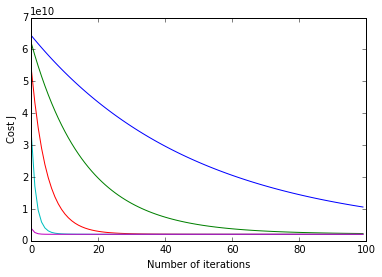

Theta (last) computed from gradient descent:
[[ 340412.65957447]
 [ 109447.79646964]
 [  -6578.35485416]]

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $293081.464335
Theta computed from the normal equations:
[[ 89597.90954435]
 [   139.21067402]
 [ -8738.01911278]]

Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
 $293081.464335


In [46]:
#Main Function
if __name__ == '__main__':
    data = np.loadtxt('./Data/ex1data2.txt', delimiter=',')
    X = mat(data[:, :2])
    y = c_[data[:, 2]]
    m = X.shape[0]
 
    #plt.plot(X[0],X[1])
    # =================== Part 1: Feature Normalization
    
 
    print('Normalizing Features ...')
    X, mu, sigma = featureNormalize(X)
 
    # =================== Part 2: Gradient descent
 
    X = c_[np.ones(m), X]
 
    iterations = 100
 
    for alpha in [0.01, 0.03, 0.1, 0.3, 1.]: # divergence at 3.0
        theta = c_[np.zeros(3)]
        theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
 
        # Plot the convergence graph
        plt.plot(r_[:iterations], J_history, linewidth=1)
 
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost J')
    plt.show()
 
    print('Theta (last) computed from gradient descent:')
    print(theta)
    print('')
 
    house = [1650, 3]
    house = (house - mu) / sigma
    price = r_[1, house].dot(theta)
 
    print('Predicted price of a 1650 sq-ft, 3 br house ' \
          '(using gradient descent):\n $%f' % price)
 
    #raw_input('Press any key to continue\n')
 
    # =================== Part 3: Normal equations
 
    data = np.loadtxt('./Data/ex1data2.txt', delimiter=',')
    X = mat(data[:, :2])
    y = c_[data[:, 2]]
    m = X.shape[0]
 
    X = c_[np.ones(m), X]
 
    theta = normalEqn(X, y)
 
    print('Theta computed from the normal equations:')
    print(theta)
    print('')
 
    house = [1650, 3];
    price = r_[1, house].dot(theta);
 
    print('Predicted price of a 1650 sq-ft, 3 br house ' \
          '(using normal equations):\n $%f' % price)